# Méthodes de machine learning

** Classification : exemple des iris **

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Régression logistique

On veut prédire une variable aléatoire $Y$ à partir d'un vecteur de variables explicatives $X=(X_1,...,X_n)$
On 


La fonction logistique $\frac{e^{x}}{1+e^{x}}$ varie entre $-\infty$ et $+\infty$ pour $x$ variant entre $0$ et $1$.  
Elle est souvent utilisée pour "mapper" une probabilité et un espace réel

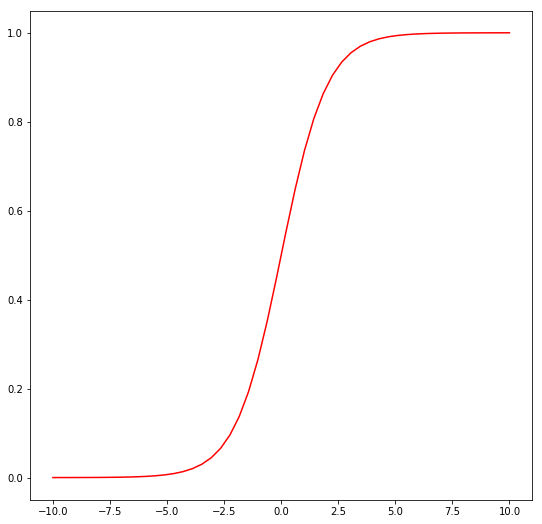

In [3]:
plt.figure(figsize=(9,9))

logistique = lambda x: np.exp(x)/(1+np.exp(x))   

x_range = np.linspace(-10,10,50)       
y_values = logistique(x_range)

plt.plot(x_range, y_values, color="red")

La régression logistique consiste à trouver une fonction linéaire C(X) qui permette d'estimer la probabilité de $Y=1$ connaissant $X$ :
$$p(Y=1|X) = \frac{e^{C(X)}}{1+e^{C(X)}}$$

Autrement dit, cela revient à trouver une séparation linéaire des caractéristiques qui minimise un critère d'erreur.

Pour plus de détails, cf par exemple :  
http://eric.univ-lyon2.fr/~ricco/cours/cours/pratique_regression_logistique.pdf

### Tracé d'une régression logistique simple

In [4]:
iris = sns.load_dataset("iris")

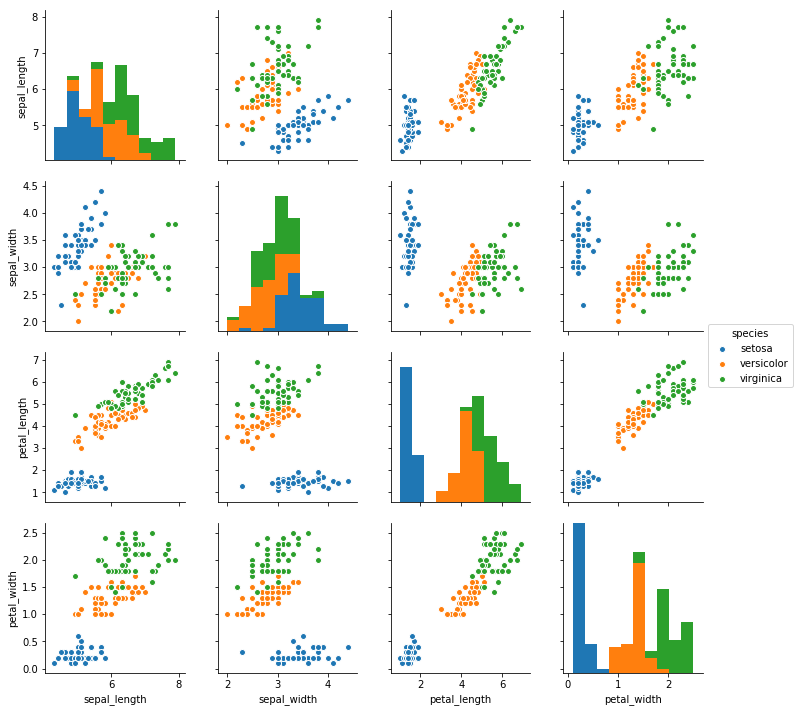

In [5]:
sns.pairplot(iris, hue="species")

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


On transforme la colonne *species* en trois colonnes *species_setosa, species_versicolor, species_virginica* avec des valeurs binaires 0 ou 1 :

In [8]:
iris2 = pd.get_dummies(data=iris, columns=['species'])

In [9]:
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


On peut tracer la courbe de régression logistique pour prédire l'espèce Setosa à partir de la longueur du sépale avec la fonction *lmplot* :

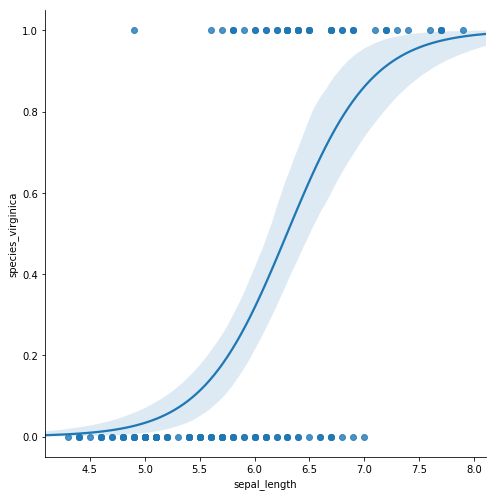

In [10]:
sns.lmplot(x='sepal_length', y='species_virginica', data=iris2, size=7, logistic=True)

On veut maintenant prédire l'espèce à partir de toutes les caractéristiques, et évaluer la qualité de cette prédiction

## Jeux de données apprentissage et test

On sépare le dataset en deux parties :
- un ensemble d'apprentissage (entre 70% et 90% des données), qui va permettre d'entraîner le modèle
- un ensemble de test (entre 10% et 30% des données), qui va permettre d'estimer la pertinence de la prédiction

(tester la pertinence sur l'ensemble d'apprentissage introduit évidemment un biais)

In [11]:
data_train = iris.sample(frac=0.8)          # 80% des données avec frac=0.8
data_test = iris.drop(data_train.index)     # le reste des données pour le test

In [12]:
# On peut sauvegarder cet échantillonnage sous la forme de fichiers, 
# de manière à éviter une variabilité des résultats due au choix aléatoire
data_train.to_csv('iris_train.csv', index=False)
data_test.to_csv('iris_test.csv', index=False)

In [13]:
# On peut utiliser les fichiers fournis pour avoir une base équitable
data_train = pd.read_csv('iris_train0.csv')
data_test = pd.read_csv('iris_test0.csv')

On sépare les données d'apprentissage (*X_train*) et la cible (*Y_train*, la colonnes des données *species*)

In [15]:
X_train = data_train.drop(['species'], axis=1)
Y_train = data_train.species
X_test = data_test.drop(['species'], axis=1)
Y_test = data_test.species

## Régression logistique : apprentissage

In [16]:
# On importe le module de régression logistique
from sklearn.linear_model import LogisticRegression

On entraîne le modèle de régression logistique avec *fit* :

In [17]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

On peut prédire les valeurs sur l'ensemble de test avec le modèle entraîné :

In [18]:
Y_lr = lr.predict(X_test)
print(Y_lr)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica']


## Score et matrice de confusion

On veut maintenant mesurer la pertinence des valeurs prédites *Y_lr* par rapport aux valeurs réelles *Y_test*

Le module *metrics* de *sklearn* regroupe des fonctions pour évaluer le score d'une méthode :

In [19]:
from sklearn import metrics

Pour évaluer la pertinence, on peut compter le nombre d'erreurs sur le nombre de possibilités :

In [20]:
metrics.accuracy_score(Y_test, Y_lr)

0.9333333333333333

93% environ de bonnes prédictions

Une mesure plus fine consiste à compter le nombre de **faux positif** (valeur prédite 1 et réelle 0) et de **vrai négatif** (valeur prédite 0 et réelle 1). On utilise une **matrice de confusion** :

In [21]:
cm = metrics.confusion_matrix(Y_test, Y_lr)
print(cm)

[[ 9  0  0]
 [ 0  9  2]
 [ 0  0 10]]


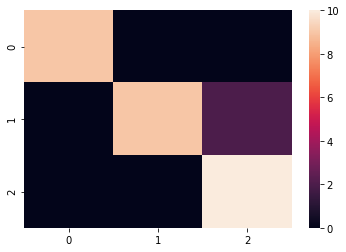

In [23]:
sns.heatmap(cm)

## Arbres de décision

Un arbre de décision permet de faire à chaque étape un choix entre deux possibilités, pour arriver à une réponse sur les feuilles (cf. Akinator)
<img src="http://fr.akinator.com/bundles/elokencesite/images/akitudes/akinator_defi.png?v86">

Pour construire un arbre de décision à partir d'un ensemble d'apprentissage, on va choisir une variable qui sépare l'ensemble en deux parties les plus distinctes en fonction d'un critère. Sur les iris par exemple, on peut utiliser la largeur du pétale pour séparer l'espèce Setosa des autres.

L'indice *GINI* mesure avec quelle fréquence un élément aléatoire de l'ensemble serait mal classé si son étiquette était sélectionnée aléatoirement depuis la distribution des étiquettes dans le sous-ensemble.

In [24]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
Y_dtc = dtc.predict(X_test)
metrics.accuracy_score(Y_test, Y_dtc)

1.0

L'arbre de décision :
<img src="http://cedric.cnam.fr/vertigo/Cours/ml2/_images/tparbresiris.svg">

On peut modifier certains paramètres :  Le paramètre *max_depth* est un seuil sur la profondeur maximale de l’arbre. Le paramètre *min_samples_leaf* donne le nombre minimal d’échantillons dans un noeud feuille.

In [26]:
dtc1 = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 20)

On obtient un arbre un peu différent :
<img src="http://cedric.cnam.fr/vertigo/Cours/ml2/_images/tparbresiris1.svg">

In [27]:
dtc1.fit(X_train,Y_train)
Y_dtc1 = dtc1.predict(X_test)
metrics.accuracy_score(Y_test, Y_dtc1)

1.0

Pour plus de détails sur les arbres de décision :  
https://zestedesavoir.com/tutoriels/962/les-arbres-de-decisions/comprendre-le-concept/#1-les-origines  
http://cedric.cnam.fr/vertigo/Cours/ml2/tpArbresDecision.html  
http://perso.mines-paristech.fr/fabien.moutarde/ES_MachineLearning/Slides/coursFM_AD-RF.pdf  

### Réglage des paramètres

La méthode *GridSearchCV* permet de tester plusieurs combinaisons de paramètres (listés dans une grille de paramètres) et de sélectionner celle qui donne la meilleure pertinence

In [29]:
from sklearn import model_selection

In [30]:
param_grid = {
              'max_depth': [3, 5, 7],
              'min_samples_leaf': [1, 5, 20]
             }
estimator = tree.DecisionTreeClassifier()
dtc_gs = model_selection.GridSearchCV(estimator, param_grid)

On lance l'entrainement (cela peut prendre du temps) :

In [31]:
dtc_gs.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 5, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

On peut voir les paramètres sélectionnés et le score :

In [32]:
print(dtc_gs.best_params_)

{'max_depth': 3, 'min_samples_leaf': 5}


On sélectionne le meilleur estimateur :

In [33]:
dtc2 = dtc_gs.best_estimator_

In [34]:
Y_dtc2 = dtc2.predict(X_test)
dtc2_score = metrics.accuracy_score(Y_test, Y_dtc2)
print(dtc2_score)

1.0


## Forêts aléatoires (Random forests)

Choisir systématiquement la plus forte segmentation d'une variable n'est pas toujours le meilleur choix et peut conduire à des phénomènes de *surapprentissage*  
Les forêts aléatoires construisent plusieurs arbres sur des sous-ensembles des caractéristiques choisis aléatoirement, et on détermine le choix final par *vote majoritaire*  
<img src="https://infinitescript.com/wordpress/wp-content/uploads/2016/08/Random-Forest-Example.jpg">

In [35]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_rf = rf.predict(X_test)

In [36]:
rf_score = metrics.accuracy_score(Y_test, Y_rf)
print(rf_score)

1.0


[[ 9  0  0]
 [ 0 11  0]
 [ 0  0 10]]


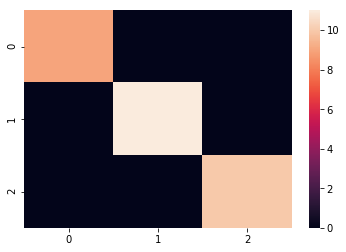

In [37]:
cm = metrics.confusion_matrix(Y_test, Y_rf)
print(cm)
sns.heatmap(cm)

Les forêts aléatoires permettent de déterminer l'importance des différentes caractéristiques avec l'attribut *feature_importances_* :

In [38]:
rf.feature_importances_

array([0.13523781, 0.03586586, 0.49258247, 0.33631386])

On peut visualiser ces degrés d'importance avec un graphique à barres par exemple :

Text(0.5,1,'Importance des caracteristiques')

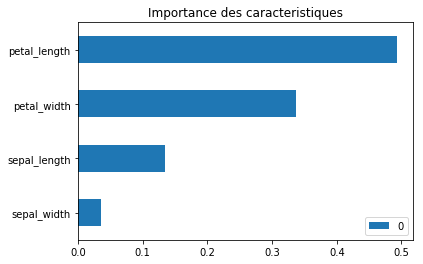

In [39]:
importances = list(zip(rf.feature_importances_, X_train.columns))
importances.sort(reverse=False)
plt.figure(figsize=(12,10))
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'barh')
plt.title('Importance des caracteristiques')

## Exercice : appliquer les méthodes sur le dataset *Indian Diabete*

Tester les méthodes présentées sur l'exemple du diabète.  
Essayer d'autres méthodes de classification

http://scikit-learn.org/0.16/tutorial/machine_learning_map/index.html
<img src = "http://scikit-learn.org/0.16/_static/ml_map.png">

Par exemple, les machines à support de vecteurs :

In [ ]:
from sklearn import svm
svc = svm.SVC()
# ...

Pour plus de détails sur les machines à support :  
https://www.svm-tutorial.com/  
http://www.grappa.univ-lille3.fr/~ppreux/papiers/man.pdf
<img src = "http://scikit-learn.org/stable/_images/sphx_glr_plot_iris_001.png">

## Exercice : avec les arbres:

In [192]:
dr= pd.read_csv("diabete.csv")

data_train = dr.sample(frac=0.8)          # 80% des données avec frac=0.8
data_test = dr.drop(data_train.index)     # le reste des données pour le test

# On peut sauvegarder cet échantillonnage sous la forme de fichiers, 
# de manière à éviter une variabilité des résultats due au choix aléatoire
data_train.to_csv('diab_train.csv', index=False)
data_test.to_csv('diab_test.csv', index=False)

# On peut utiliser les fichiers fournis pour avoir une base équitable
data_train = pd.read_csv('diab_train.csv')
data_test = pd.read_csv('diab_test.csv')

X_train = data_train.drop(['diabete'], axis=1)
Y_train = data_train.diabete
X_test = data_test.drop(['diabete'], axis=1)
Y_test = data_test.diabete

dr.head(10)

,n_pregnant,glucose,tension,thickness,insulin,bmi,pedigree,age,diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [145]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_rf = rf.predict(X_test)
rf_score = metrics.accuracy_score(Y_test, Y_rf)
print(rf_score)

0.7207792207792207


[[85 10]
 [23 36]]


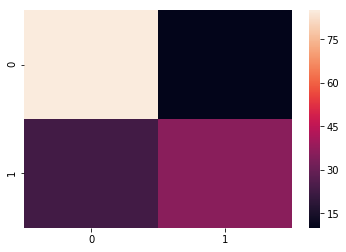

In [88]:
cm = metrics.confusion_matrix(Y_test, Y_rf)
print(cm)
sns.heatmap(cm)

Text(0.5,1,'Importance des caracteristiques')

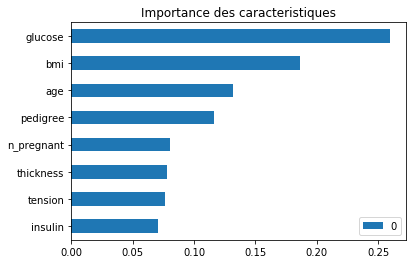

In [91]:
rf.feature_importances_
importances = list(zip(rf.feature_importances_, X_train.columns))
importances.sort(reverse=False)
plt.figure(figsize=(12,10))
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'barh')
plt.title('Importance des caracteristiques')

In [187]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
Y_dtc = dtc.predict(X_test)
metrics.accuracy_score(Y_test, Y_dtc)

0.7012987012987013

Text(0.5,1,'Importance des caracteristiques')

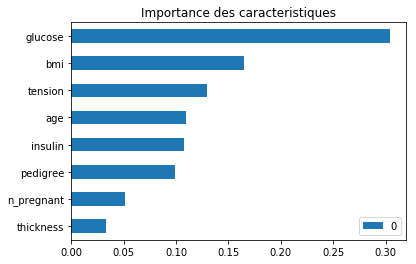

In [188]:
dtc.feature_importances_
importances = list(zip(dtc.feature_importances_, X_train.columns))
importances.sort(reverse=False)
plt.figure(figsize=(12,10))
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'barh')
plt.title('Importance des caracteristiques')